# Regression : House Price Prediction
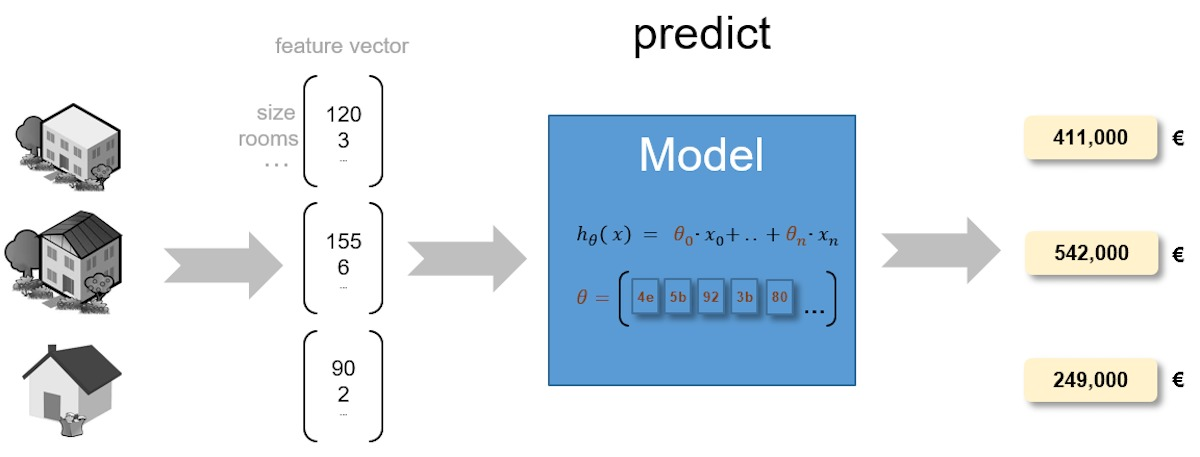

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading of prepared training dataset
df_train = pd.read_csv('housing.csv')
df_train.head()

# Extracting X_train (n_samples, n_features) and y_train (target variable)

X_train = df_train.drop("median_house_value", axis=1)  
y_train = df_train["median_house_value"].to_numpy() 

print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_train = train_test_split(X_train, y_train, test_size=.2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Extracting X_train (n_samples, n_features) and y_train (target variable)

X_train = df_train.drop("median_house_value", axis=1)  
y_train = df_train["median_house_value"].to_numpy() 

print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_train = train_test_split(X_train, y_train, test_size=.2)


X_train: (20640, 9) ; y_train: (20640,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_train = train_test_split(X_train, y_train, test_size=.2)

In [3]:
# Loading of prepared testing dataset
df_test = pd.read_csv('housing.csv')
# extracting X_test and y_test
X_test= df_test.drop("median_house_value", axis=1) 
y_test = df_test["median_house_value"].to_numpy() 
print('X_test:', X_test.shape, '; y_test:', np.shape(y_test))

X_test: (20640, 9) ; y_test: (20640,)


# Modeling & Validation

### (Q1) How to select the right Machine Learning algorithm?
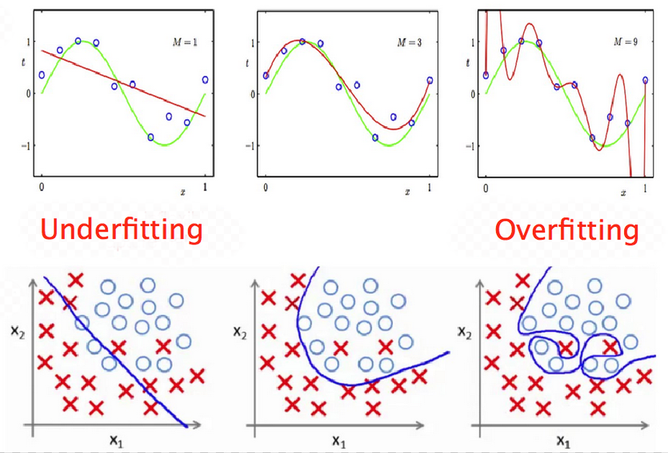

### `Optimization / Generalization Dilemma`
+ `Underfitting` (`High Bias`): The model is very simple compared to training data $==>$ Low performances on both training and testing datasets.
+ `Overfitting` (`High Variance`): The model is very complex compared to training data $==>$ Good performances on training dataset but low performances on testing dataset. $==>$ The model can't generalize!

### Types of errors
+ `Variance error`: It refers to the amount that the predicted value would change if different training data were used.
+ `Bias error`: It is the error due to the model assumptions that are made to simplify the model.
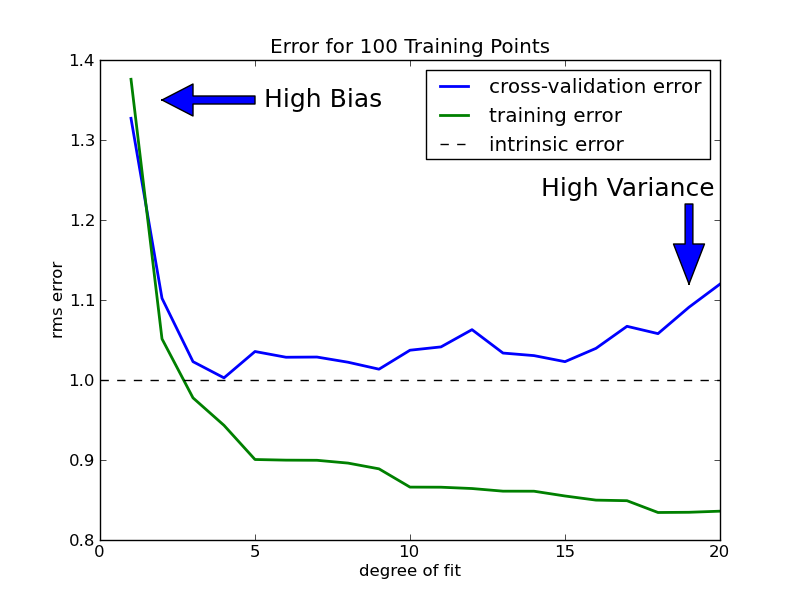
### (Q2) What is the `right fitting`?

## Performance Metrics for Regression
+ `Coefficient of Determination` or `R-square`: 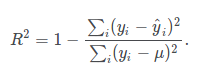
+ `Measures of Error` : 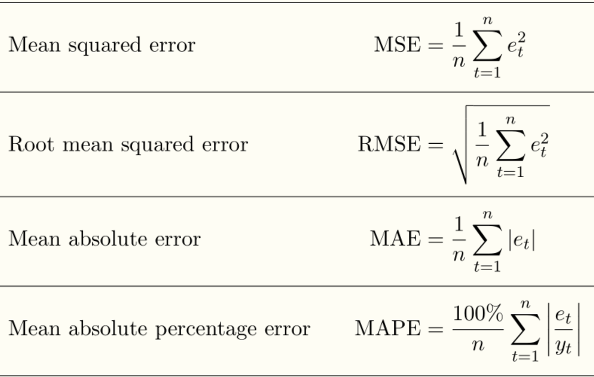

## How to improve machine learning model performance?

+ Create a `validation dataset` from the training dataset.
+ Apply the `k-fold cross-validation` for training to avoid the <b>overfitting problem.
+ Fine-tune the hyperparameters based on the validation dataset and `GridSearchCV` or `RandomizedSearchCV` methods ==> Select the best predictive model with  the hyperparameters that give the best performance metrics.

# Training, Validation & Testing Datasets

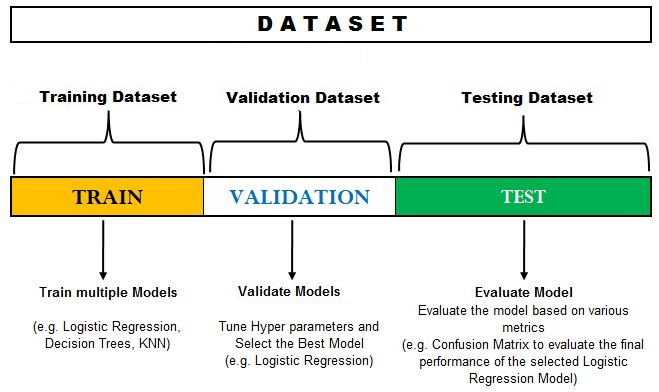
+ `Training dataset` is used to train the model.
+ `Validation dataset`is used to fine-tune the model hyperparameters.
+ `Testing dataset` is used to evaluate the model performance.

# K-Fold Cross-Validation
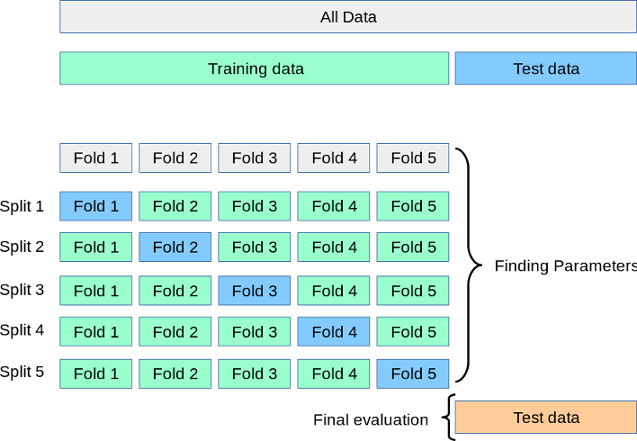

# Cross-Validation and Hyperparameter Tuning
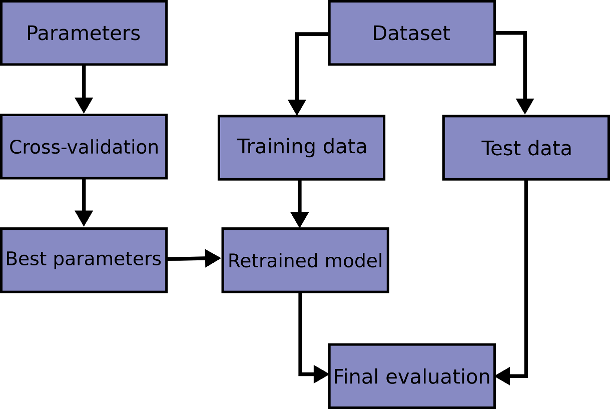

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline

# https://scikit-learn.org/stable/modules/linear_model.html#
from sklearn.linear_model import LinearRegression, Ridge

# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import mean_absolute_percentage_error, r2_score 

# https://scikit-learn.org/stable/model_selection.html
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

In [5]:
# Defaut hyperparameters
print("Linear regression: ", LinearRegression().get_params())
print("Ridge:", Ridge().get_params())

Linear regression:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Ridge: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [6]:
pipelines = []
params = []
names = []

# Add Linear regression
pipelines.append(Pipeline([('clf', LinearRegression())])) ## LinearRegression
params.append({}) # use default hyperparameters
names.append('LinearRegression')

# Add Ridge
pipelines.append(Pipeline([('clf', Ridge())])) ## Ridge
params.append({'clf__alpha':np.linspace(1, 10, 10)}) # # fine-tuning of alpha
names.append('Ridge')

In [7]:
# training with K-fold cross-validation & fine-tuning of hyperparameters with GridSearchCV
# n_jobs = -1 means using all processors

def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32) # KFold with 10 folds
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,y)  # supervised training on k-1 folds
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_ # best model has the highest R2 score
    estimator.fit(X,y) # training on all the training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)): # build two estimators    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

C:\Users\harouna.soumare\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harouna.soumare\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harouna.soumare\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\harouna.soumare\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._valid

ValueError: could not convert string to float: 'NEAR BAY'

# RandomForestRegressor
Random Forest is a supervised machine learning algorithm made up of an `ensemble` of decision trees.
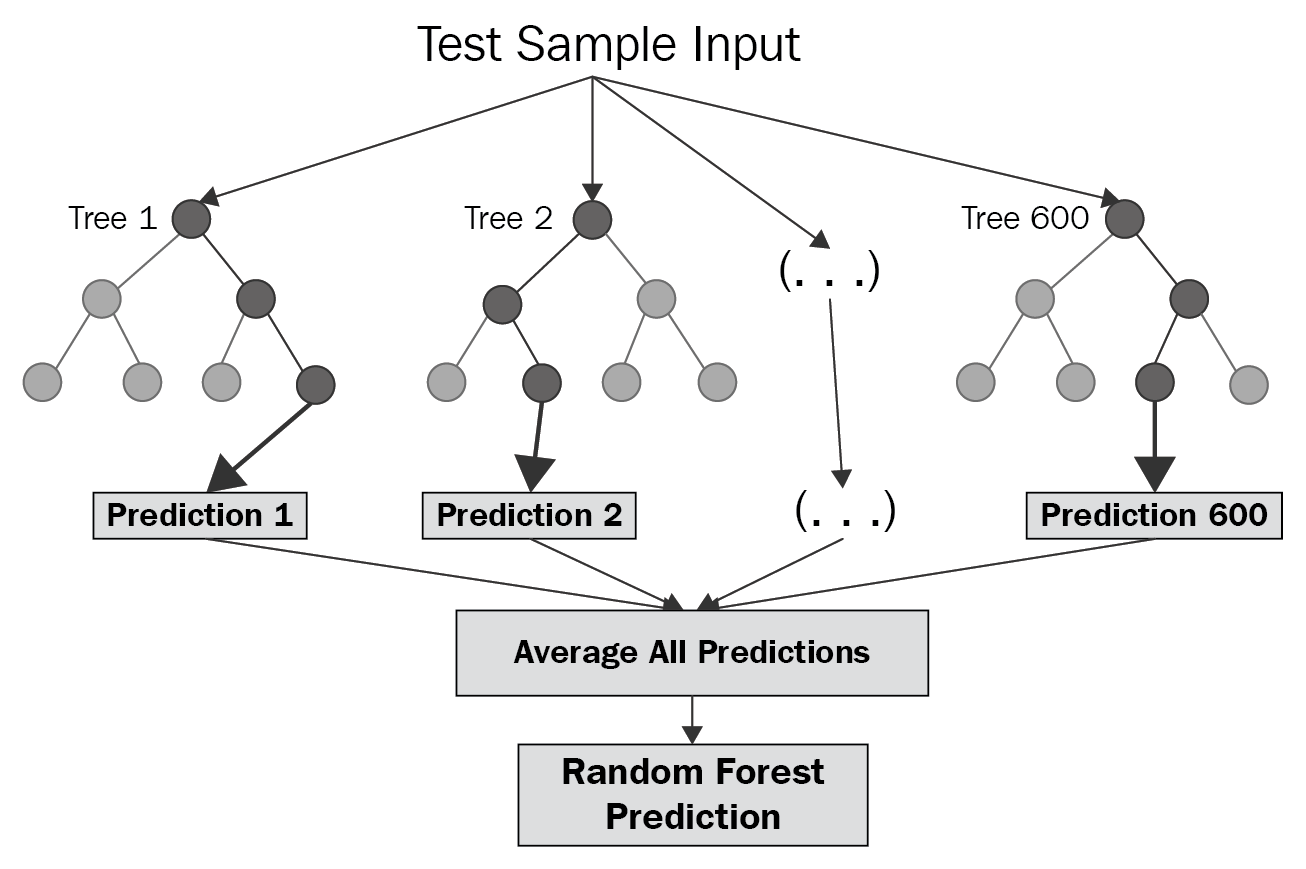

In [9]:
import pandas as pd

df = pd.read_csv('housing.csv')

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
X, y = df.drop(columns=['median_house_value']), df.median_house_value

In [13]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [14]:
y.shape

(20640,)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading of prepared training dataset
df_train = pd.read_csv('housing.csv')
df_train.head()

# Extracting X_train (n_samples, n_features) and y_train (target variable)



In [15]:
 df_train.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [16]:
 df_train =  df_train.dropna()

In [18]:
 df_train.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
df_train.ocean_proximity = LabelEncoder().fit_transform(df_train.ocean_proximity)

In [38]:
df_train = df_train.drop(['longitude', 'latitude'], 1)

C:\Users\harouna.soumare\AppData\Local\Temp\ipykernel_7852\2501030097.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop(['longitude', 'latitude'], 1)


In [37]:
df_train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3


In [57]:
X_train = df_train.drop("median_house_value", axis=1)  
y_train = df_train["median_house_value"].to_numpy() 

print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2)
print('X_train:', X_train.shape, '; y_train:', y_train.shape)


X_train: (20433, 7) ; y_train: (20433,)
X_train: (16346, 7) ; y_train: (16346,)


In [58]:
X_train.shape, y_train.shape

((16346, 7), (16346,))

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model = RandomForestRegressor()

In [62]:
model.fit(X_train, y_train)


RandomForestRegressor()

In [64]:
y_pred = model.predict(X_test)

In [63]:
X_test.shape

(4087, 7)

In [48]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_pred, y_test)

0.6108428855356731

In [67]:
model.predict(inputs)

array([447226.5])

In [51]:
df_train.head(1)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3


In [66]:
import pandas as pd
d={}
i=0
val = [ 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252,3]
for col in [ 'housing_median_age','total_rooms','total_bedrooms','population',	'households',	'median_income',	'ocean_proximity']:
    d[col] = val[i]
    i+=1
d
inputs = pd.DataFrame(d, index=[0])
inputs

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,3


In [70]:
inputs.to_json('donnees_entree_form.json')

In [71]:
inputs = pd.DataFrame(d, index=[0])
bd = pd.read_json('donnees_entree_form.json')


In [72]:
bd

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,129,322,126,8.3252,3


In [73]:
inputs

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,3


In [76]:
pd.concat([bd, inputs],0).reset_index(drop=True).to_json("donnees_entrees_form.json")

C:\Users\harouna.soumare\AppData\Local\Temp\ipykernel_7852\139637430.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat([bd, inputs],0).reset_index(drop=True).to_json("donnees_entrees_form.json")


In [68]:
import joblib  

joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# default hyperparameters
print(RandomForestRegressor().get_params())

# Add RandomForestRegressor 
pipelines.append(Pipeline([('reg', RandomForestRegressor())])) 
params.append({'clf__n_estimators': [50,100,150,200]}) # fine-tuning de n_estimators
names.append('RandomForestRegressor')

# build RandomForestRegressor estimator
estimators.append(model(pipelines[-1], params[-1], names[-1], X_train, y_train))

In [ ]:
# Performance evaluation on testing dataset
for i, estimator in enumerate(estimators):
    print('\nPerformance of', names[i])
    y_pred = estimator.predict(X_test)
    print('mean_squared_error :', mean_absolute_percentage_error(y_test, y_pred))    
    print('r2_score :', r2_score(y_test, y_pred))

In [ ]:
# save the best model with dump() 
import joblib  
for i, estimator in enumerate(estimators):
    joblib.dump(estimators[2], names[2]+".pkl")

# load the model
# RF_regressor = joblib.load(names[2]+"pkl")